In [1]:
import os
import json
from datasets import dataset_factory
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
import numpy as np
from scipy.interpolate import make_interp_spline 

In [2]:
model_path='experiments/10k_wucnn_2020-09-09_3'
#model_path='final_logs/10k_cnn_add_lpe_al30_k4_lr1e-3_L2_H4_pD0.2_s1_2020-09-08_0'

In [11]:
class Namespace(object):
    def __init__(self, adict):
        self.__dict__.update(adict)

In [12]:
with open(os.path.join(model_path, 'config.json'), 'r') as infile:
    config_dict = json.load(infile)
    
args = Namespace(config_dict)
dataset = dataset_factory(args)

In [13]:
config_dict.keys()

dict_keys(['mode', 'template', 'local', 'path_test_model', 'load_config', 'use_test_model_dir', 'dataset_code', 'dataset_path', 'min_rating', 'min_uc', 'min_sc', 'split', 'dataset_split_seed', 'eval_set_size', 'min_hist_len', 'min_counts_for_vocab', 'max_vocab_size', 'max_article_len', 'max_hist_len', 'min_test_len', 'use_article_content', 'precompute_art_emb', 'incl_time_stamp', 'incl_u_id', 'time_threshold', 'train_method', 'n_articles', 'n_users', 'validation_portion', 'lower_case', 'language', 'dataloader_code', 'dataloader_random_seed', 'train_batch_size', 'val_batch_size', 'test_batch_size', 'eval_method', 'train_seq_order', 'eval_seq_order', 'train_negative_sampler_code', 'train_negative_sample_size', 'train_negative_sampling_seed', 'test_negative_sampler_code', 'test_negative_sample_size', 'test_negative_sampling_seed', 'trainer_code', 'device', 'num_gpu', 'device_idx', 'cuda_launch_blocking', 'optimizer', 'lr', 'weight_decay', 'momentum', 'grad_clip_val', 'lr_schedule', 'decay

In [19]:
args.dataset_add_info = None

In [20]:
# load prepped dataset

In [21]:
dataset = dataset_factory(args)

In [22]:
dataset._get_preprocessed_folder_path()

PosixPath('Data/preprocessed/DPG_nov19_u10k-bert_news-artl30-histl100-nenc_None-time1')

In [23]:
data = dataset.load_dataset()

Already preprocessed. Skip preprocessing


In [24]:
u_data = data['u_id2info']

In [25]:
next(iter(u_data.items()))

('0051f142-a28d-44c2-884d-592c608fa4b1',
 {'articles_read': [('4702e42', 1572615572),
   ('725f0fa', 1572617273),
   ('10b5379', 1572617383),
   ('1d8c0ec', 1572644714),
   ('b258a3e', 1572697066),
   ('753b6b0', 1572795651),
   ('aa8e930', 1572795678),
   ('38291d1', 1572795697),
   ('8d29e14', 1572801924),
   ('5832b8e', 1572801972),
   ('5a74754', 1572802129),
   ('2211429', 1572802248),
   ('7607963', 1572887337),
   ('b3fa551', 1573077314),
   ('310b580', 1573077413),
   ('17cb338', 1573406413),
   ('ae2eba5', 1573406594),
   ('cf64dfa', 1573574573),
   ('6a1b4bb', 1573626291),
   ('e746c33', 1573626468),
   ('f37a51b', 1573713539),
   ('1da6d10', 1573713567),
   ('596b6c2', 1573713595),
   ('b9e6b5b', 1573768897),
   ('d637736', 1573895889),
   ('827ff55', 1573895936),
   ('54ce32c', 1574015762),
   ('5b59fca', 1574015805),
   ('72c449e', 1574015906),
   ('3879fc0', 1574112172),
   ('f986f71', 1574112229),
   ('0580cf2', 1574112322),
   ('db01f0b', 1574112345),
   ('08656d0', 157

In [26]:
u_df = pd.DataFrame.from_dict(u_data, orient='index')
u_df = u_df.drop(['opened_pushes', 'articles_pushed'], axis=1)
u_df.head()

,articles_read,articles_train,articles_test,n_arts_read
000016a9-6665-442b-87f1-662efa7d1b13,"[(f7db535, 1573973552), (1128216, 1574049451),...","[[2ee393d, 1574224464], [64b8b01, 1574397271],...","[[3af2b58, 1575150291], [5c76ef6, 1575150176],...",43
0005d90e-9af4-455f-98da-3070c060a99d,"[(f964e1a, 1572588703), (83f248a, 1572641235),...","[[6b8951d, 1573584003], [90a8595, 1574023608],...","[[f9463e5, 1575040172], [8ab4daa, 1575023622],...",66
0006af13-73d5-417e-be70-02dc4bd32661,"[(b687ca3, 1572588902), (765e5d8, 1572820240),...","[[15dd1da, 1574195619], [b687ca3, 1572588902],...","[[9cdaec0, 1574585754], [7d1efa5, 1574704731],...",21
000970cc-a98e-49a4-a2fc-c7ba4e404441,"[(ae18dcd, 1572600735), (abfc315, 1572742216),...","[[18766b6, 1573823972], [eab4beb, 1573824015],...","[[5933d2c, 1574596228], [10d25e6, 1574596193],...",37
000a5325-012c-4bf6-91b2-e9ed817f282b,"[(9b0e87d, 1572596921), (440cd81, 1572631298),...","[[0421aa2, 1574152678], [b9f2f78, 1573329164],...","[[66f2aaa, 1574867938], [db41b37, 1574867976],...",67


Text(0, 0.5, 'Proportion')

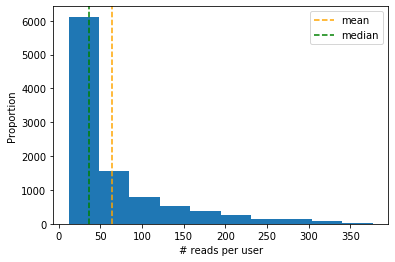

In [27]:
plt.hist(u_df['n_arts_read'], density=False)
plt.axvline(u_df['n_arts_read'].mean(), color='orange', linestyle='--', label='mean')
plt.axvline(u_df['n_arts_read'].median(), color='g', linestyle='--', label='median')
plt.legend()
plt.xlabel('# reads per user')
plt.ylabel('Proportion')

In [28]:
len(u_df[u_df['n_arts_read'] < 50])

6177

In [29]:
len(u_df[u_df['n_arts_read'] > 80])

2430

In [30]:
u_ids_lhist = u_df.index[u_df['n_arts_read'] > 50].to_list()

In [31]:
# load user metrics from single exps

In [32]:
model_path='final_logs/10k_cnn_add_lpe_al30_k4_lr1e-3_L2_H4_pD0.2_s1_2020-09-08_0'

with open(Path(model_path + "/user_metrics.json")) as fin:
    metrics = json.load(fin)

In [33]:
next(iter(metrics['val']))

'0051f142-a28d-44c2-884d-592c608fa4b1'

In [34]:
u_df.loc['0051f142-a28d-44c2-884d-592c608fa4b1']

articles_read     [(4702e42, 1572615572), (725f0fa, 1572617273),...
articles_train    [[b258a3e, 1572697066], [5eec4d4, 1574543882],...
articles_test     [[9df498b, 1575007664], [26698d6, 1575015079],...
n_arts_read                                                      58
Name: 0051f142-a28d-44c2-884d-592c608fa4b1, dtype: object

In [35]:
next(iter(metrics['val'].items()))

('0051f142-a28d-44c2-884d-592c608fa4b1',
 {'lpe': {'Recall@5': '1.0000',
   'NDCG@5': '0.5000',
   'AUC': '0.5000',
   'MRR': '0.3333',
   'scores': '0.0006, 0.0130, 0.0000, 0.8557, 0.1308'}})

In [36]:
pos_emb = 'lpe'
x, y = [], []

for u_id, vals in metrics['val'].items(): 
    x.append(u_df.loc[u_id]['n_arts_read'])
    y.append(vals[pos_emb]['AUC'])

l = sorted(zip(x, y), key = lambda t: t[0])

In [37]:
# create histogram: x: hist_len; y: AUC_val

In [38]:
def link_hist2scores(metrics, pos_emb, u_df, min_hl=0, max_hl=1000):

    len_auc, len_mrr = defaultdict(list), defaultdict(list)
    all_auc = []

    for u_id, vals in metrics.items(): 
        hl = u_df.loc[u_id]['n_arts_read']
        
        if hl > min_hl and hl < max_hl:
            if pos_emb is not None:
                len_auc[hl].append(float(vals[pos_emb]['AUC']))
                len_mrr[hl].append(float(vals[pos_emb]['MRR']))
                all_auc.append(float(vals[pos_emb]['AUC']))
            else:
                len_auc[hl].append(float(vals['AUC']))
                len_mrr[hl].append(float(vals['MRR']))
                all_auc.append(float(vals['AUC']))

    aucs = sorted([(hl, np.mean(vals), len(vals)) for hl, vals in len_auc.items()], key = lambda t: t[0])
    mrrs = sorted([(hl, np.mean(vals), len(vals)) for hl, vals in len_mrr.items()], key = lambda t: t[0]) 
    
    return all_auc, aucs, mrrs

In [39]:
all_auc, aucs, mrrs = link_hist2scores(metrics['val'], 'lpe', u_df)

In [40]:
x, y_auc, s_a = zip(*aucs)
x, y_mrr, s_m = zip(*mrrs)

In [79]:
def smooth(y, box_pts, n_first_valid=None):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    if n_first_valid is not None:
        valid_conv = np.convolve(y, box, mode='valid')
        y_smooth[:n_first_valid] = valid_conv[:n_first_valid]
        y_smooth[-2:] = valid_conv[-2:]
    return y_smooth

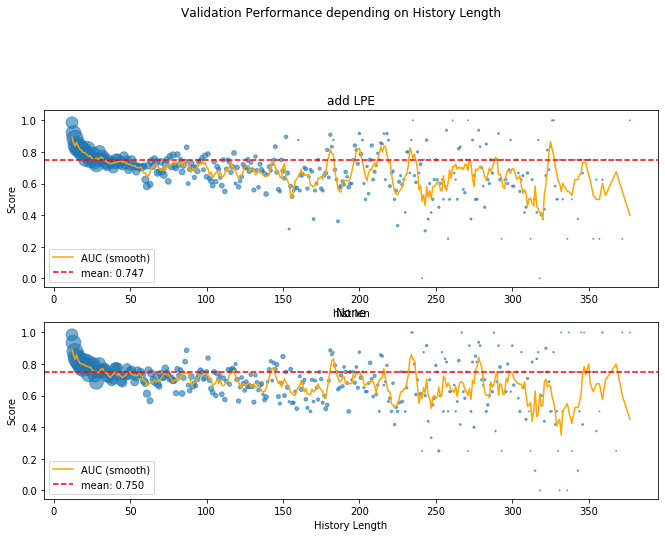

In [46]:
fig = plt.figure(figsize=(11, 8))

# LPE
model_path='final_logs/10k_cnn_add_lpe_al30_k4_lr1e-3_L2_H4_pD0.2_s1_2020-09-08_0'

with open(Path(model_path + "/user_metrics.json")) as fin:
    metrics = json.load(fin)

all_auc, aucs, mrrs = link_hist2scores(metrics['val'], 'lpe', u_df)
x, y_auc, s_a = zip(*aucs)
x, y_mrr, s_m = zip(*mrrs)

plt.subplot(211)

plt.scatter(x, y_auc, s=s_a, alpha=0.6)
plt.plot(x, smooth(y_auc, 5, 3), color="orange", label="AUC (smooth)")

#plt.plot(x, smooth(y_mrr, 10), label="MRR (smooth)")
#plt.plot(x, y, label="AUC")
plt.axhline(np.mean(all_auc), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(all_auc)))
plt.xlabel("hist len")
plt.ylabel("Score")
plt.title("add LPE")
plt.legend()


# NONE

model_path='final_logs/10k_cnn_None_al30_k4_lr1e-3_L2_H4_pD0.2_pM0.15_s1_2020-09-09_0'

with open(Path(model_path + "/user_metrics.json")) as fin:
    metrics = json.load(fin)
    
    
all_auc, aucs, mrrs = link_hist2scores(metrics['val'], 'None', u_df)
x, y_auc, s_a = zip(*aucs)
x, y_mrr, s_m = zip(*mrrs)

plt.subplot(212)

plt.scatter(x, y_auc, s=s_a, alpha=0.6)
plt.plot(x, smooth(y_auc, 5, 3), color="orange", label="AUC (smooth)")

#plt.plot(x, smooth(y_mrr, 10), label="MRR (smooth)")
#plt.plot(x, y, label="AUC")
plt.axhline(np.mean(all_auc), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(all_auc)))
plt.xlabel("History Length")
plt.ylabel("Score")
plt.title("None")
#plt.suptitle("Validation Performance depending on History Length")
#plt.subplots_adjust(top=0.80)
plt.legend()
#plt.tight_layout()

In [124]:
def single_plot(x, y, s, label, title, color="orange"):
    plt.scatter(x, y, s=s, alpha=0.6)
    plt.plot(x, smooth(y, 5, 3), color=color, label=label+" (smooth)")

    plt.axhline(np.mean(y), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(y)))
    plt.xlabel("History Length")
    plt.ylabel(label + " Score")
    plt.title(title)
    plt.legend()

def plot_auc_mrr(fig_size=(14, 8), min_hl=0, max_hl=1000):
    fig = plt.figure(figsize=fig_size)

    # LPE
    model_path='final_logs/10k_cnn_add_lpe_al30_k4_lr1e-3_L2_H4_pD0.2_s1_2020-09-08_0'

    with open(Path(model_path + "/user_metrics.json")) as fin:
        metrics = json.load(fin)

    all_auc, aucs, mrrs = link_hist2scores(metrics['val'], 'lpe', u_df, min_hl=min_hl, max_hl=max_hl)
    x, y_auc, s_a = zip(*aucs)

    plt.subplot(221)
    
    single_plot(x, y_auc, s_a, 'AUC', 'add LPE')

    ####
    plt.subplot(223)
    x, y_mrr, s_m = zip(*mrrs)

    plt.scatter(x, y_mrr, s=s_m, alpha=0.6)
    plt.plot(x, smooth(y_mrr, 5, 3), color="green", label="MRR (smooth)")
    plt.axhline(np.mean(y_mrr), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(y_mrr)))

    #plt.plot(x, smooth(y_mrr, 10), label="MRR (smooth)")
    #plt.plot(x, y, label="AUC")
    #plt.axhline(np.mean(all_auc), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(all_auc)))
    plt.xlabel("History Length")
    plt.ylabel("MRR Score")
    plt.legend()

    # NONE

    model_path='final_logs/10k_cnn_None_al30_k4_lr1e-3_L2_H4_pD0.2_pM0.15_s1_2020-09-09_0'

    with open(Path(model_path + "/user_metrics.json")) as fin:
        metrics = json.load(fin)


    all_auc, aucs, mrrs = link_hist2scores(metrics['val'], 'None', u_df, min_hl=min_hl, max_hl=max_hl)
    x, y_auc, s_a = zip(*aucs)
    x, y_mrr, s_m = zip(*mrrs)

    plt.subplot(222)

    plt.scatter(x, y_auc, s=s_a, alpha=0.6)
    plt.plot(x, smooth(y_auc, 5, 3), color="orange", label="AUC (smooth)")

    plt.axhline(np.mean(all_auc), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(all_auc)))
    plt.xlabel("History Length")
    plt.ylabel("AUC Score")
    plt.title("None")
    plt.legend()


    ######
    plt.subplot(224)
    plt.scatter(x, y_mrr, s=s_m, alpha=0.6)
    plt.plot(x, smooth(y_mrr, 5, 3), color="green", label="MRR (smooth)")
    plt.axhline(np.mean(y_mrr), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(y_mrr)))
    plt.xlabel("History Length")
    plt.ylabel("MRR Score")

    plt.legend()
    #fig.suptitle("Min hl = {} & Max hl = {}".format(min_hl, max_hl), fontsize=14)

    #plt.tight_layout()
    
    return fig

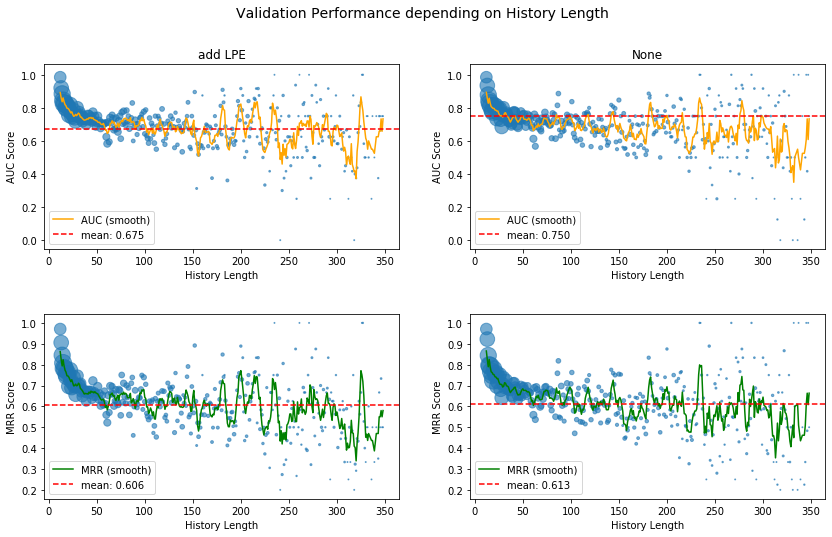

In [90]:
fig = plot_auc_mrr(min_hl=0, max_hl=350)
fig.suptitle("Validation Performance depending on History Length", fontsize=14)
fig.subplots_adjust(hspace=0.35)
res_dir="./plots/draft_01/"
#plt.savefig(res_dir + "01_performanc_v_histlen_no_min_hl", dpi=400, bbox_inches='tight')

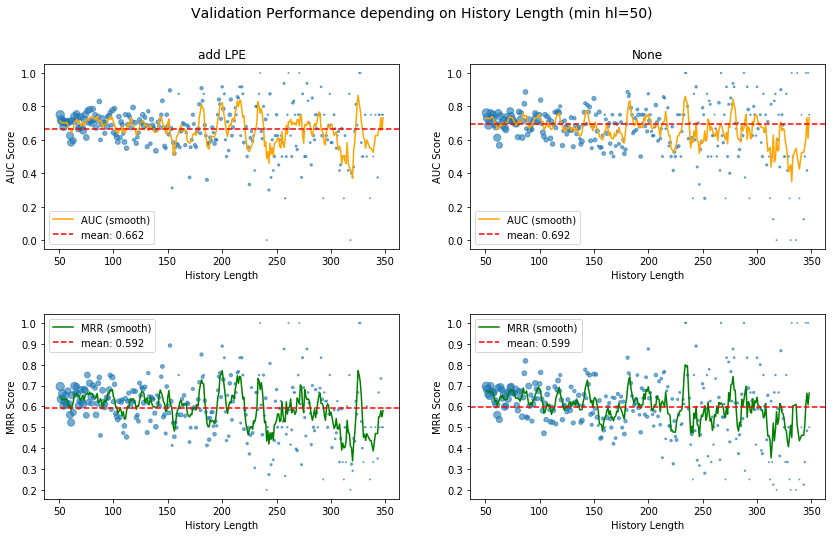

In [85]:
min_hl=50
fig = plot_auc_mrr(min_hl=min_hl, max_hl=350)
fig.suptitle("Validation Performance depending on History Length (min hl={})".format(min_hl), fontsize=14)
fig.subplots_adjust(hspace=0.35)
res_dir="./plots/draft_01/"
plt.savefig(res_dir + "01_performanc_v_histlen_min_hl{}".format(min_hl), dpi=400, bbox_inches='tight')

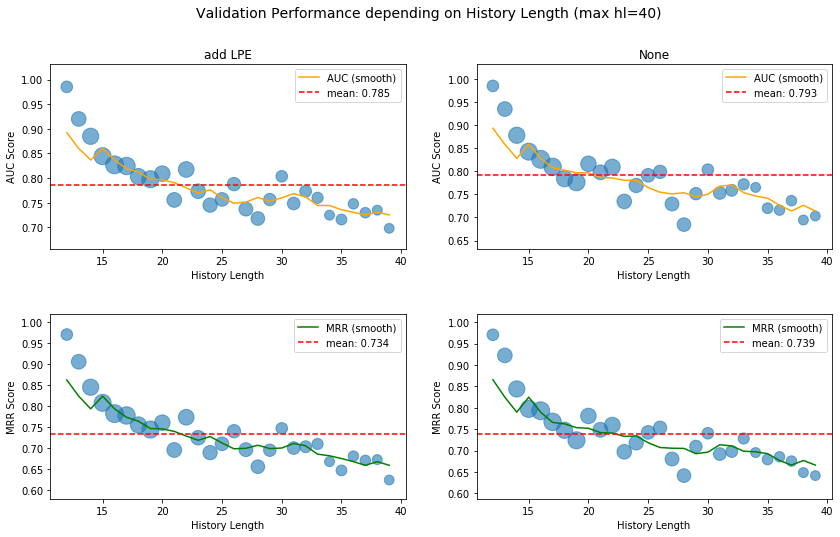

In [83]:
max_hl=40
fig = plot_auc_mrr(max_hl=max_hl)

fig.suptitle("Validation Performance depending on History Length (max hl={})".format(max_hl), fontsize=14)
fig.subplots_adjust(hspace=0.35)
res_dir="./plots/draft_01/"
plt.savefig(res_dir + "01_performanc_v_histlen_max_hl{}".format(max_hl), dpi=400, bbox_inches='tight')

In [125]:
# def link_hist2scores2(metrics, pos_emb, u_df, min_hl=0, max_hl=150):

#     len_auc, len_mrr = defaultdict(list), defaultdict(list)
#     all_auc = []

#     for u_id, vals in metrics.items(): 
#         hl = u_df.loc[u_id]['n_arts_read']
        
#         if hl > min_hl:
#             if hl >= max_hl:
#                 hl = max_hl
            
#             if pos_emb is not None:
#                 len_auc[hl].append(float(vals[pos_emb]['AUC']))
#                 len_mrr[hl].append(float(vals[pos_emb]['MRR']))
#                 all_auc.append(float(vals[pos_emb]['AUC']))
#             else:
#                 len_auc[hl].append(float(vals['AUC']))
#                 len_mrr[hl].append(float(vals['MRR']))
#                 all_auc.append(float(vals['AUC']))

#     aucs = sorted([(hl, np.mean(vals), len(vals)) for hl, vals in len_auc.items()], key = lambda t: t[0])
#     mrrs = sorted([(hl, np.mean(vals), len(vals)) for hl, vals in len_mrr.items()], key = lambda t: t[0]) 
    
#     return all_auc, aucs, mrrs


# def single_plot(x, y, s, label, title):
#     plt.scatter(x, y, s=s, alpha=0.6)
#     plt.plot(x, smooth(y, 5, 3), color="orange", label=label+" (smooth)")

#     plt.axhline(np.mean(y), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(y)))
#     plt.xlabel("History Length")
#     plt.ylabel(label + " Score")
#     plt.title(title)
#     plt.legend()

# def plot_auc_mrr(fig_size=(14, 8), min_hl=0, max_hl=1000):
#     fig = plt.figure(figsize=fig_size)

#     # LPE
#     model_path='final_logs/10k_cnn_add_lpe_al30_k4_lr1e-3_L2_H4_pD0.2_s1_2020-09-08_0'

#     with open(Path(model_path + "/user_metrics.json")) as fin:
#         metrics = json.load(fin)

#     all_auc, aucs, mrrs = link_hist2scores2(metrics['val'], 'lpe', u_df, min_hl=min_hl, max_hl=max_hl)
#     x, y_auc, s_a = zip(*aucs)

#     plt.subplot(221)
    
#     single_plot(x, y_auc, s_a, 'AUC', 'add LPE')

#     ####
#     plt.subplot(223)
#     x, y_mrr, s_m = zip(*mrrs)

#     plt.scatter(x, y_mrr, s=s_m, alpha=0.6)
#     plt.plot(x, smooth(y_mrr, 5, 3), color="green", label="MRR (smooth)")
#     plt.axhline(np.mean(y_mrr), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(y_mrr)))

#     #plt.plot(x, smooth(y_mrr, 10), label="MRR (smooth)")
#     #plt.plot(x, y, label="AUC")
#     #plt.axhline(np.mean(all_auc), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(all_auc)))
#     plt.xlabel("History Length")
#     plt.ylabel("MRR Score")
#     plt.legend()

#     # NONE

#     model_path='final_logs/10k_cnn_None_al30_k4_lr1e-3_L2_H4_pD0.2_pM0.15_s1_2020-09-09_0'

#     with open(Path(model_path + "/user_metrics.json")) as fin:
#         metrics = json.load(fin)


#     all_auc, aucs, mrrs = link_hist2scores2(metrics['val'], 'None', u_df, min_hl=min_hl, max_hl=max_hl)
#     x, y_auc, s_a = zip(*aucs)
#     x, y_mrr, s_m = zip(*mrrs)

#     plt.subplot(222)

#     plt.scatter(x, y_auc, s=s_a, alpha=0.6)
#     plt.plot(x, smooth(y_auc, 5, 3), color="orange", label="AUC (smooth)")

#     plt.axhline(np.mean(all_auc), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(all_auc)))
#     plt.xlabel("History Length")
#     plt.ylabel("AUC Score")
#     plt.title("None")
#     plt.legend()


#     ######
#     plt.subplot(224)
#     plt.scatter(x, y_mrr, s=s_m, alpha=0.6)
#     plt.plot(x, smooth(y_mrr, 5, 3), color="green", label="MRR (smooth)")
#     plt.axhline(np.mean(y_mrr), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(y_mrr)))
#     plt.xlabel("History Length")
#     plt.ylabel("MRR Score")

#     plt.legend()
#     #fig.suptitle("Min hl = {} & Max hl = {}".format(min_hl, max_hl), fontsize=14)

#     #plt.tight_layout()
    
#     return fig

In [126]:
logs_path = 'final_logs/'
models = {'None': '10k_cnn_None_al30_k4_lr1e-3_L2_H4_pD0.2_pM0.15_s1_2020-09-09_0', 
         'LPE': '10k_cnn_add_lpe_al30_k4_lr1e-3_L2_H4_pD0.2_s1_2020-09-08_0'}

In [128]:
# fig = plot_auc_mrr(min_hl=0, max_hl=300)
# fig.suptitle("Validation Performance depending on History Length", fontsize=14)
# fig.subplots_adjust(hspace=0.35)
# res_dir="./plots/draft_01/"
# #plt.savefig(res_dir + "01_performanc_v_histlen_no_min_hl", dpi=400, bbox_inches='tight')

In [222]:
model_path='final_logs/10k_npa_mod_al30_hl100_k4_lr1e-3_s1_2020-09-08_1'

with open(Path(model_path + "/user_metrics.json")) as fin:
    metrics = json.load(fin)

next(iter(metrics['val'].items()))

('0051f142-a28d-44c2-884d-592c608fa4b1',
 {'npa_mod': {'Recall@10': '1.0000',
   'NDCG@10': '0.4307',
   'Recall@5': '1.0000',
   'NDCG@5': '0.4307',
   'AUC': '0.6667',
   'MRR': '0.2500',
   'scores': '0.0014, 0.0001, 0.0002, 0.0000, 0.0009, 0.0023, 0.9356, 0.0000, 0.0592, 0.0003'}})

In [228]:
all_auc, aucs, mrrs = link_hist2scores(metrics['val'], 'npa_mod', u_df)
x, y_auc, s_a = zip(*aucs)
x, y_mrr, s_m = zip(*mrrs)

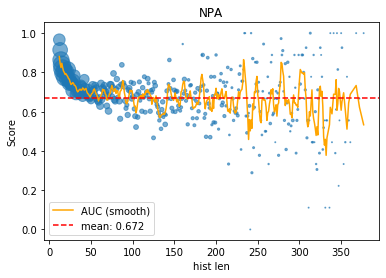

In [229]:
single_plot(x, y_auc, s_a, 'AUC', 'NPA')

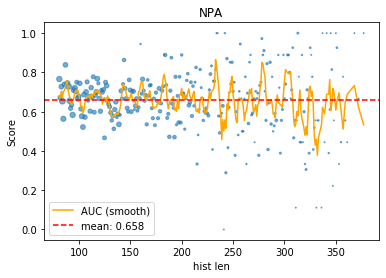

In [232]:
all_auc, aucs, mrrs = link_hist2scores(metrics['val'], 'npa_mod', u_df, min_hl=80)
x, y_auc, s_a = zip(*aucs)
x, y_mrr, s_m = zip(*mrrs)
single_plot(x, y_auc, s_a, 'AUC', 'NPA')

In [131]:
logs_path = 'final_logs/'
models = {'None': '10k_cnn_min_hl50_None_al30_k4_lr1e-3_L2_H4_pD0.2_pM0.15_s2_2020-09-21_0', 
          'LPE': '10k_cnn_add_min_hl50_lpe_al30_k4_lr1e-3_L2_H4_pD0.2_s2_2020-09-21_0'}

In [132]:
with open(os.path.join(logs_path, models['None'], 'config.json'), 'r') as infile:
    config_dict = json.load(infile)
    
args = Namespace(config_dict)
dataset = dataset_factory(args)

data = dataset.load_dataset()

u_data = data['u_id2info']

u_df = pd.DataFrame.from_dict(u_data, orient='index')
u_df = u_df.drop(['opened_pushes', 'articles_pushed'], axis=1)
u_df.head()

Already preprocessed. Skip preprocessing


,articles_read,articles_train,articles_test,n_arts_read
0000db21-795d-40e8-8db6-88fc8a2bf966,"[(7e99a5f, 1572645747), (b63467c, 1572645749),...","[[197f5f0, 1574351249], [2ee975e, 1574351249],...","[[0e300a2, 1575031455], [70bc17f, 1575031450],...",73
00066792-ee36-43e6-884e-461929519d42,"[(0637cc8, 1572629951), (cff4032, 1572807404),...","[[b8a89ab, 1573067536], [c2a903e, 1574356497],...","[[ea67094, 1574751795], [80f04a5, 1574751629],...",95
00102eda-3232-4e8f-be72-1d700952034e,"[(82a7541, 1572601453), (1f078ab, 1572601466),...","[[aa644f5, 1574156929], [f19cfb5, 1574156897],...","[[8ac3718, 1575019252], [2cd0fb9, 1575019000],...",87
0010a593-f25a-418c-a037-18f6a72b371d,"[(fbf72ad, 1572607478), (6a213d7, 1572622464),...","[[d913eab, 1574281479], [3060332, 1574281391],...","[[ed170da, 1575055429], [816251f, 1575007304],...",143
001bb14f-a074-40c3-97fc-b2f73f25d895,"[(29fc4f6, 1572598289), (4e8fdee, 1572624939),...","[[2029311, 1572678847], [6219ee9, 1572678846],...","[[1add150, 1574580403], [f56079e, 1574580548],...",187


In [133]:
u_df['n_arts_read'].mean()

143.9909

In [134]:
def plot_auc_mrr(model_paths, fig_size=(14, 8), min_hl=0, max_hl=1000, logs_path='final_logs/', pos_keys=['LPE', 'None']):
    fig = plt.figure(figsize=fig_size)

    # LPE    
    model = model_paths['LPE']
    with open(Path(logs_path + model + "/user_metrics.json")) as fin:
        metrics = json.load(fin)

    all_auc, aucs, mrrs = link_hist2scores(metrics['val'], 'lpe', u_df, min_hl=min_hl, max_hl=max_hl)
    x, y_auc, s_a = zip(*aucs)

    plt.subplot(221)
    
    single_plot(x, y_auc, s_a, 'AUC', 'add LPE')
    ##
    plt.subplot(223)
    x, y_mrr, s_m = zip(*mrrs)
    single_plot(x, y_mrr, s_m, 'MRR', '', color='green')

    # NONE

    model = model_paths['None']
    with open(Path(logs_path + model + "/user_metrics.json")) as fin:
        metrics = json.load(fin)


    all_auc, aucs, mrrs = link_hist2scores(metrics['val'], 'None', u_df, min_hl=min_hl, max_hl=max_hl)
    x, y_auc, s_a = zip(*aucs)
    x, y_mrr, s_m = zip(*mrrs)

    plt.subplot(222)

    single_plot(x, y_auc, s_a, 'AUC', 'None')
    ##
    plt.subplot(224)
    x, y_mrr, s_m = zip(*mrrs)
    
    single_plot(x, y_mrr, s_m, 'MRR', '', color='green')


    ######
    
    
#     plt.scatter(x, y_mrr, s=s_m, alpha=0.6)
#     plt.plot(x, smooth(y_mrr, 5, 3), color="green", label="MRR (smooth)")
#     plt.axhline(np.mean(y_mrr), color='red', linestyle='--', label="mean: {:.3f}".format(np.mean(y_mrr)))
#     plt.xlabel("History Length")
#     plt.ylabel("MRR Score")

#     plt.legend()
    #fig.suptitle("Min hl = {} & Max hl = {}".format(min_hl, max_hl), fontsize=14)

    #plt.tight_layout()
    
    return fig

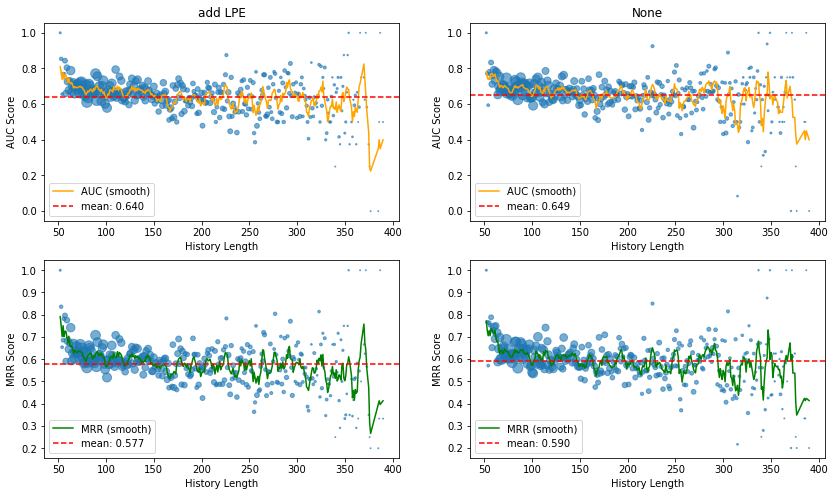

In [135]:
fig = plot_auc_mrr(models)